# Community Detection (Label Propagation)

This notebook demonstrates the implementation of the label propagation algorithm for community detection **in graphs**. For a description of the algorithm, see **this README**.

This notebook contains **the following sections**:

### Library Imports
This section imports the libraries **and modules** required to run logistic regression. The **following dependencies are required**


In [58]:
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import networkx as nx
from networkx.algorithms.community.quality import modularity
import matplotlib.pyplot as plt
import numpy as np
from rice_ml.unsupervised_learning.communitydetection import *

### Data Loading
The data used in this notebook comes from **the Cora dataset with given features.**

In [59]:
dataset = Planetoid(root = 'data/Cora', name = 'Cora')
data = dataset[0]
G = to_networkx(data, to_undirected = True)

### Data Cleaning & Visualization

**Visualizing this graph; it's quite large, so only visualizing a subset**

In [60]:
# Printing the number of nodes and edges, as well as example labels
print(f"Graph Statistics:\n{'-'*17}")
print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")

Graph Statistics:
-----------------
Nodes: 2708
Edges: 5278


Because the size of the original graph makes it difficult to visualize and process, we will apply the community detection algorithm only to a subgraph. We first create a subgraph by finding a suitable set of connected components, and display the subgraph using the NetworkX `draw` command.

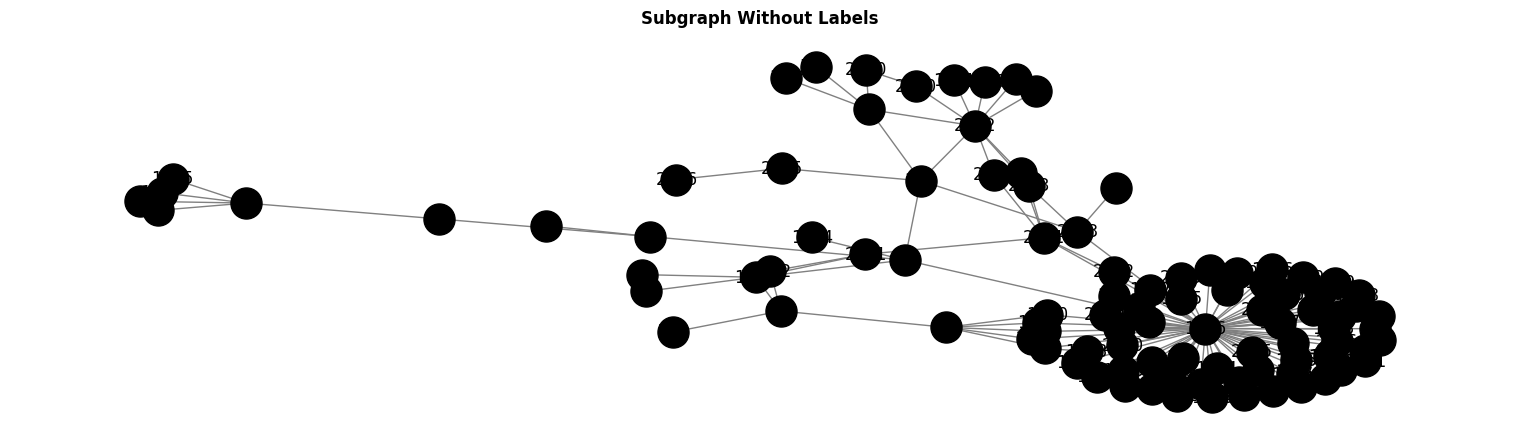

In [61]:
# Finding a suitable subgraph
largest_cc = max(nx.connected_components(G))
start_node = list(largest_cc)[1]
sub_nodes = list(nx.bfs_tree(G, start_node, depth_limit = 5))[:100]
sub_G = G.subgraph(sub_nodes)

# Finding 
plt.figure(figsize=(15, 4))
pos = nx.spring_layout(sub_G, seed=42)
nx.draw(sub_G, with_labels = True, node_color = 'black', node_size = 500, edge_color = 'gray', pos = pos)
plt.title("Subgraph Without Labels", fontweight = 'bold')
plt.show()

### Label Propagation Implementation

This section covers **the steps for data processing.** Because the **Cora dataset comes with all labels, but label propagation is supposed to have some labels, we arbitrarily remove a set of labels to simulate a dataset that will allow for label propagation**.

In [62]:
labeling = label_propagation(sub_G, max_iter = 100, random_state = 42)
labeling.propagation()
communities = labeling.get_communities('dict')

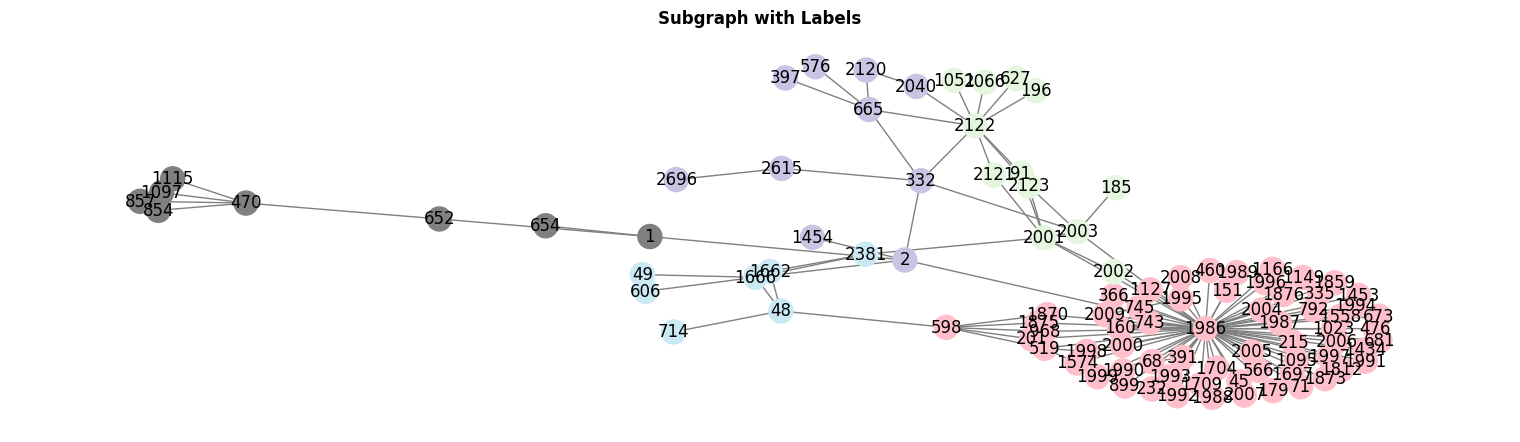

In [63]:
node_colors = {}
colors = ['gray', '#CBC3E3', 'pink', '#E5F6DF', '#CAE9F5']

for i, (label, nodes) in enumerate(communities.items()):
    for node in nodes:
        node_colors[node] = colors[i % len(colors)]

color_list = [node_colors[node] for node in sub_G.nodes()]

plt.figure(figsize=(15, 4))
pos = nx.spring_layout(sub_G, seed = 42)
nx.draw(sub_G, with_labels = True, node_color = color_list, node_size = 300, edge_color = 'gray', pos = pos)
plt.title("Subgraph with Labels", fontweight = 'bold')
plt.show()

In [70]:
from networkx.algorithms.community.quality import modularity
communities_list = [set(nodes) for nodes in communities.values()]
mod = modularity(sub_G, communities_list)
print("Modularity:", mod)

Modularity: 0.4948096885813149


**interpretation -- good??**

### Label Propagation Implementation (Changing Features)

**todo - finish!!**

In [68]:
# Arrays for modularity
max_iter_array = np.linspace(1, 200, 10)
mod_array = np.full(len(max_iter_array), np.nan)

for i in range(len(max_iter_array)):
    labeling = label_propagation(sub_G, max_iter = int(max_iter_array[i]), random_state = 42)
    labeling.propagation()
    communities = labeling.get_communities('dict')
    communities_list = [set(nodes) for nodes in communities.values()]
    mod = modularity(sub_G, communities_list)
    mod_array[i] = mod

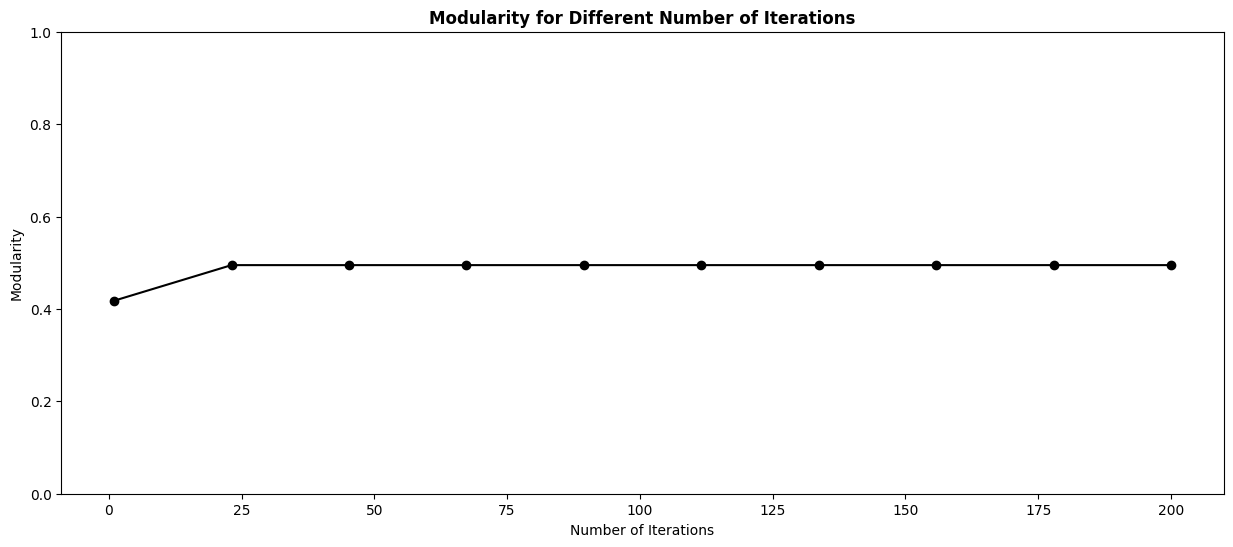

In [69]:
# Plotting the change in modularity across different numbers of maximum iterations
plt.figure(figsize = (15, 6))
plt.plot(max_iter_array, mod_array, 'black')
plt.scatter(max_iter_array, mod_array, color = 'black')
plt.title("Modularity for Different Number of Iterations", fontweight = 'bold')
plt.xlabel("Number of Iterations")
plt.ylabel("Modularity")
plt.ylim(0, 1)
plt.show()

**interpretation - modularity increases, but not much; this is an acceptable modularity value**